# Lab 3
## More EDA: improving expertise in loading, cleaning, and analyzing data

The objective of Lab 3 is for you to become more proficient in obtaining and working with different types of data. A particular emphasis will be on dealing with text data.

This lab assignment will have 3 components. 

## Lab 3.A. Complete tutorials from Harvard's CS109 Lab 1

Go to https://github.com/cs109/2015lab1 and download the following files in your local Lab3 directory:
- https://github.com/cs109/2015lab1/blob/master/all.csv
- https://github.com/cs109/2015lab1/blob/master/hamlet.txt

We are going to go through the *Lab1-babypython.ipynb* and *Lab1-pythonpandas.ipynb*. The orginal Python notebooks were written in Python 2. We converted the notebooks into Python 3, which can be downloaded from here"

- https://github.com/CIS3715-temple-2019/CIS3715-temple-2019.github.io/blob/master/CIS3715-Lab3.A-babypython_py3.ipynb
- https://github.com/CIS3715-temple-2019/CIS3715-temple-2019.github.io/blob/master/CIS3715-Lab3.A-pythonpandas_py3.ipynb

Study all the code and run every block of code from the *babypython* tutorial. It covers many of the things you already learned in your Labs 1 and 2, so it is a good refresher. However, there are some new things. In particular, you will learn how to load a pure textual file and process it to find counts of all the unique words (also called the tokens) in the text.

Study all the code and run every block of code from the *pythonpandas* tutorial. Again, you will find there many things you already know. However, the novelty here is in processing and analysis of a slightly messy tabular data than was the case with the *Auto MPG data*.



**Deliverable**: submit the two .ipynb files after you have run all the lines of code. We will appreciate if we see that you put some extra effort, such as trying to modify existing code, enter new lines of code, or provide comments in the text. Make sure any modifications are easily visible by us for the grading purposes.

## Lab 3.B. Movie Lens Data

In this part of the lab, you will be working on an exercise that is a slightly modified and shortened version of https://github.com/cs109/2015/blob/master/Lectures/02-DataScrapingQuizzes.ipynb. In particular, you will learn how to load and analyze MoviLens data, which contains ratings of multiple movies by multiple users.

**The MovieLens data**

http://grouplens.org/datasets/movielens/

Take some time to learn about the data, because it will be helpful to do the assignment.


In [88]:
## all imports
from IPython.display import HTML
import numpy as np
import requests
import bs4 #this is beautiful soup
import time
import operator
import socket
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
# Read the user data:
#   pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']

users = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.user', 
    sep='|', names=u_cols, engine='python')

users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [90]:
# Read the ratings:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.data', 
    sep='\t', names=r_cols, engine='python')

ratings.head() 

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [91]:
# Read the movies data
#  the movies file contains columns indicating the movie's genres
#  let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 
            'video_release_date', 'imdb_url']

movies = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.item', 
    sep='|', names=m_cols, usecols=range(5), engine='python')

movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


Get information about the data:

In [92]:
print(movies.dtypes)
print()
print(movies.describe())
# *** Why only those two columns? ***

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object
()
          movie_id  video_release_date
count  1682.000000                 0.0
mean    841.500000                 NaN
std     485.695893                 NaN
min       1.000000                 NaN
25%     421.250000                 NaN
50%     841.500000                 NaN
75%    1261.750000                 NaN
max    1682.000000                 NaN


Selecting data:

* DataFrame => group of Series with shared index
* single DataFrame column => Series

In [93]:
users.head()
users['occupation'].head()
## *** Where did the nice design go? ***
columns_you_want = ['occupation', 'sex'] 
users[columns_you_want].head()

print(users.head())

print(users.iloc[3])

   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213
user_id                4
age                   24
sex                    M
occupation    technician
zip_code           43537
Name: 3, dtype: object


Filtering data:

Select users older than 25

In [94]:
oldUsers = users[users.age > 25]
oldUsers.head()

,user_id,age,sex,occupation,zip_code
1,2,53,F,other,94043
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201


**Question 1**: 
* show users aged 40 and male
* show the mean age of female programmers

In [95]:
# users aged 40 AND male
# your code here
users_40_M = users[(users.age == 40) & (users.sex == 'M')]
users_40_M

,user_id,age,sex,occupation,zip_code
18,19,40,M,librarian,02138
82,83,40,M,other,44133
115,116,40,M,healthcare,97232
199,200,40,M,programmer,93402
283,284,40,M,executive,92629
289,290,40,M,engineer,93550
308,309,40,M,scientist,70802
357,358,40,M,educator,10022
397,398,40,M,other,60008
564,565,40,M,student,55422


In [96]:
## users who are female and programmers
# your code here
users_programmer_F = users[(users.sex == 'F') & (users.occupation == 'programmer')]

## show statistic summary or compute mean
# your code here
print users_programmer_F.describe()

#compute mean
print "\nMean age of Female Programmers: ", users_programmer_F.age.mean()


          user_id        age
count    6.000000   6.000000
mean   411.166667  32.166667
std    149.987222   5.115336
min    292.000000  26.000000
25%    313.000000  28.250000
50%    378.000000  32.000000
75%    416.750000  36.500000
max    698.000000  38.000000

Mean age of Female Programmers:  32.1666666667


Find Diligent Users

- split data per user ID
- count ratings
- combine result



In [97]:
print(ratings.head())
## split data
grouped_data = ratings.groupby('user_id')
#grouped_data = ratings['movie_id'].groupby(ratings['user_id'])

## count and combine
ratings_per_user = grouped_data.count()

ratings_per_user.head(5)

   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596


,movie_id,rating,unix_timestamp
user_id,,,
1,272,272,272
2,62,62,62
3,54,54,54
4,24,24,24
5,175,175,175


**Question 2**:
* get the average rating per movie
* advanced: get the movie titles with the highest average rating

In [98]:
## split data
grouped_movie_data = ratings['rating'].groupby(ratings['movie_id'])
## average and combine
avg_movie_ratings = grouped_movie_data.mean()
print "Average ratings per movie:"
print avg_movie_ratings.head(25)

# get the maximum rating
max_movie_rating = avg_movie_ratings.max()

# get movie ids with that rating
top_movie_ids = avg_movie_ratings[avg_movie_ratings == max_movie_rating].index

Average ratings per movie:
movie_id
1     3.878319
2     3.206107
3     3.033333
4     3.550239
5     3.302326
6     3.576923
7     3.798469
8     3.995434
9     3.896321
10    3.831461
11    3.847458
12    4.385768
13    3.418478
14    3.967213
15    3.778157
16    3.205128
17    3.119565
18    2.800000
19    3.956522
20    3.416667
21    2.761905
22    4.151515
23    4.120879
24    3.448276
25    3.443686
Name: rating, dtype: float64


In [99]:
#prints movie id's for highest rated movies
print("\nGood movie ids:")
print top_movie_ids, "\n"

#prints highest rated movie titles
print("Best movie titles")
print movies[movies.movie_id.isin(top_movie_ids)].title, "\n"


Good movie ids:
Int64Index([814, 1122, 1189, 1201, 1293, 1467, 1500, 1536, 1599, 1653], dtype='int64', name=u'movie_id') 

Best movie titles
813                         Great Day in Harlem, A (1994)
1121                       They Made Me a Criminal (1939)
1188                                   Prefontaine (1997)
1200           Marlene Dietrich: Shadow and Light (1996) 
1292                                      Star Kid (1997)
1466                 Saint of Fort Washington, The (1993)
1499                            Santa with Muscles (1996)
1535                                 Aiqing wansui (1994)
1598                        Someone Else's America (1995)
1652    Entertaining Angels: The Dorothy Day Story (1996)
Name: title, dtype: object 



In [100]:
# get number of ratings per movie
ratings_per_movie = grouped_movie_data.count()
print "Number of ratings per movie"
print ratings_per_movie[avg_movie_ratings == max_movie_rating]

Number of ratings per movie
movie_id
814     1
1122    1
1189    3
1201    1
1293    3
1467    2
1500    2
1536    1
1599    1
1653    1
Name: rating, dtype: int64


**Question 3**:
* get the average rating per user
* list all occupations and if they are male or female dominant

In [101]:
# get the average rating per user
grouped_user_data = ratings['rating'].groupby(ratings['user_id'])
avg_user_ratings = grouped_user_data.mean()
avg_user_ratings.head()

user_id
1    3.610294
2    3.709677
3    2.796296
4    4.333333
5    2.874286
Name: rating, dtype: float64

In [102]:
# list all occupations and if they are male or female dominant
grouped_data = users['sex'].groupby(users['occupation'])
male_dominant_occupations = grouped_data.apply(lambda f: 
                                               sum(f == 'M') > sum(f == 'F'))
print male_dominant_occupations, "\n"

print('number of male users: ')
print(sum(users['sex'] == 'M'))

print('number of female users: ')
print(sum(users['sex'] == 'F'))

occupation
administrator     True
artist            True
doctor            True
educator          True
engineer          True
entertainment     True
executive         True
healthcare       False
homemaker        False
lawyer            True
librarian        False
marketing         True
none              True
other             True
programmer        True
retired           True
salesman          True
scientist         True
student           True
technician        True
writer            True
Name: sex, dtype: bool 

number of male users: 
670
number of female users: 
273


**Question 4**:
- produce a 1-page document that uses a combination of text, tables, and figures that provide some interesting insights about the Movie Lens data. You should feel free to use outside sources to produce the report, as long as you acknowledge your sources. 

## Lab 3.C. HTML Data

In this part of the lab, you will be also be working on an exercise that is a slightly modified and shortened version of https://github.com/cs109/2015/blob/master/Lectures/02-DataScrapingQuizzes.ipynb. In particular, you will learn how to load and analyze html data.

HTML:
* HyperText Markup Language
* standard for creating webpages
* HTML tags 
    - have angle brackets
    - typically come in pairs


In [103]:
htmlString = """<!DOCTYPE html>
<html>
  <head>
    <title>This is a title</title>
  </head>
  <body>
    <h2> Test </h2>
    <p>Hello world!</p>
  </body>
</html>"""

htmlOutput = HTML(htmlString)
htmlOutput

Useful Tags:

* heading
`<h1></h1> ... <h6></h6>`

* paragraph
`<p></p>` 

* line break
`<br>` 

* link with attribute

`<a href="http://www.example.com/">An example link</a>`

### Scraping with Python:

Example of a simple webpage: http://www.crummy.com/software/BeautifulSoup

Good news: 
    - some browsers help
    - look for: inspect element
    - need only basic html
    - try 'Ctrl-Shift I' in Chrome
    - try 'Command-Option I' in Safari
   
Different useful libraries:
    - urllib
    - beautifulsoup
    - pattern
    - soupy
    - LXML
    - ...
 
The following cell just defines a url as a string and then reads the data from that url using the `urllib` library. If you uncomment the print command you see that we got the whole HTML content of the page into the string variable source.

In [104]:
url = 'http://www.crummy.com/software/BeautifulSoup'
source = requests.get(url).text
print source

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"
"http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link rev="made" href="mailto:leonardr@segfault.org">
<link rel="stylesheet" type="text/css" href="/nb/themes/Default/nb.css">
<meta name="Description" content="Beautiful Soup: a library designed for screen-scraping HTML and XML.">
<meta name="generator" content="Markov Approximation 1.4 (module: leonardr)">
<meta name="author" content="Leonard Richardson">
</head>
<body bgcolor="white" text="black" link="blue" vlink="660066" alink="red">
<img align="right" src="10.1.jpg" width="250"><br />

<p>You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.</p>

<

**Question 5**:

* Is the word 'Alice' mentioned on the beautiful soup homepage?
* How often does the word 'Soup' occur on the site?
    - hint: use `.count()`
* At what index occurs the substring 'alien video games' ?
    - hint: use `.find()`

In [105]:
## is 'Alice' in source?
print "Is alice in source? ", ('Alice' in source)
## count occurences of 'Soup'
print "'Soup' appears", source.count('Soup')
## find index of 'alien video games'
print "Index of 'alien video games' which isn't present on the page:"\
, (source.find('alien video games'))

Is alice in source?  False
'Soup' appears 45
Index of 'alien video games' which isn't present on the page: -1


**Beautiful Soup**

* designed to make your life easier
* many good functions for parsing html code

Some examples:

In [106]:
## get bs4 object
soup = bs4.BeautifulSoup(source)
 
## compare the two print statements
#print soup
#print soup.prettify()

## show how to find all a tags
soup.findAll('a')

## ***Why does this not work? ***
#soup.findAll('Soup')

[<a href="bs4/download/"><h1>Beautiful Soup</h1></a>,
 <a href="#Download">Download</a>,
 <a href="bs4/doc/">Documentation</a>,
 <a href="#HallOfFame">Hall of Fame</a>,
 <a href="https://code.launchpad.net/beautifulsoup">Source</a>,
 <a href="https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG">Changelog</a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">Discussion group</a>,
 <a href="zine/">Zine</a>,
 <a href="https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&amp;utm_medium=referral&amp;utm_campaign=website">Tidelift subscription</a>,
 <a href="zine/"><i>Tool Safety</i></a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">the discussion\ngroup</a>,
 <a href="https://bugs.launchpad.net/beautifulsoup/">file it</a>,
 <a href="http://lxml.de/">lxml</a>,
 <a href="http://code.google.com/p/html5lib/">html5lib</a>,
 <a href="bs4/doc/">Read more.</a>,
 <a name="Downloa

More examples:

In [107]:
## get attribute value from an element:
## find tag: this only returns the first occurrence, not all tags in the string
first_tag = soup.find('a')

## get attribute `href`
first_tag.get('href')

## get all links in the page
link_list = [l.get('href') for l in soup.findAll('a')]
link_list

['bs4/download/',
 '#Download',
 'bs4/doc/',
 '#HallOfFame',
 'https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'zine/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'zine/',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'bs4/doc/',
 None,
 'bs4/download/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'download/3.x/BeautifulSoup-3.2.1.tar.gz',
 None,
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/impo

In [108]:
## filter all external links
# create an empty list to collect the valid links
external_links = []

# write a loop to filter the links
# if it starts with 'http' we are happy
for l in link_list:
    if l[:4] == 'http':
        external_links.append(l)

# this throws an error! It says something about 'NoneType'

TypeError: 'NoneType' object has no attribute '__getitem__'

In [109]:
# lets investigate. Have a close look at the link_list:
link_list

# Seems that there are None elements!
# Let's verify
#print sum([l is None for l in link_list])

# So there are two elements in the list that are None!

['bs4/download/',
 '#Download',
 'bs4/doc/',
 '#HallOfFame',
 'https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'zine/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'zine/',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'bs4/doc/',
 None,
 'bs4/download/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'download/3.x/BeautifulSoup-3.2.1.tar.gz',
 None,
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/impo

In [110]:
# Let's filter those objects out in the for loop
external_links = []

# write a loop to filter the links
# if it is not None and starts with 'http' we are happy
for l in link_list:
    if l is not None and l[:4] == 'http':
        external_links.append(l)
        
external_links

['https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/importer/',
 'http://www2.ljworld.com/',
 'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 'http://esrl.noaa.gov/gsd/fab/',
 'http://laps.noaa.gov/topograbber/',

*Note*: The above `if` condition works because of lazy evaluation in Python. The `and` statement becomes `False` if the first part is `False`, so there is no need to ever evaluate the second part. Thus a `None` entry in the list gets never asked about its first four characters. 

In [111]:
# and we can put this in a list comprehension as well, it almost reads like 
# a sentence.

[l for l in link_list if l is not None and l.startswith('http')]

['https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/importer/',
 'http://www2.ljworld.com/',
 'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 'http://esrl.noaa.gov/gsd/fab/',
 'http://laps.noaa.gov/topograbber/',

Parsing the Tree:

In [112]:
# redifining `s` without any line breaks
s = """<!DOCTYPE html><html><head><title>This is a title</title></head><body><h3> Test </h3><p>Hello world!</p></body></html>"""
## get bs4 object
tree = bs4.BeautifulSoup(s)

## get html root node
root_node = tree.html

## get head from root using contents
head = root_node.contents[0]

## get body from root
body = root_node.contents[1]

## could directly access body
tree.body

<body><h3> Test </h3><p>Hello world!</p></body>

**Question 6**:

* Find the `h3` tag by parsing the tree starting at `body`
* Create a list of all __Hall of Fame__ entries listed on the Beautiful Soup webpage
    - hint: it is the only unordered list in the page (tag `ul`)

In [113]:
## get h3 tag from body
body.contents[0]


<h3> Test </h3>

In [114]:
## use ul as entry point
ul_entry_point = soup.find('ul')

## get hall of fame list from entry point
## skip the first entry 
HOF_list = ul_entry_point.contents[1:]
## reformat into a list containing strings
## it is ok to have a list of lists
tmp = []
for li in HOF_list:
    tmp.append(li.contents)
print tmp

[[<a href="http://www.nytimes.com/2007/10/25/arts/design/25vide.html">"Movable\n Type"</a>, u', a work of digital art on display in the lobby of the New\n York Times building, uses Beautiful Soup to scrape news feeds.\n\n'], [u'Reddit uses Beautiful Soup to ', <a href="https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py">parse\na page that's been linked to and find a representative image</a>, u'.\n\n'], [u'Alexander Harrowell uses Beautiful Soup to ', <a href="http://www.harrowell.org.uk/viktormap.html">track the business\n activities</a>, u' of an arms merchant.\n\n'], [u'The developers of Python itself used Beautiful Soup to ', <a href="http://svn.python.org/view/tracker/importer/">migrate the Python\nbug tracker from Sourceforge to Roundup</a>, u'.\n\n'], [u'The ', <a href="http://www2.ljworld.com/">Lawrence Journal-World</a>, u'\nuses Beautiful Soup to ', <a href="http://www.b-list.org/weblog/2010/nov/02/news-done-broke/">gather\nstatew

`tmp` now is actually a list of lists containing the hall of fame entries. 
Here is some advanced Python on how to print really just one entry per list item.

The cool things about this are: 
* The use of `""` to just access the `join` function of strings.
* The `join` function itself
* that you can actually have two nested for loops in a list comprehension

In [115]:
test =  ["".join(str(a) for a in sublist) for sublist in tmp]
print('\n'.join(test))

<a href="http://www.nytimes.com/2007/10/25/arts/design/25vide.html">"Movable
 Type"</a>, a work of digital art on display in the lobby of the New
 York Times building, uses Beautiful Soup to scrape news feeds.


Reddit uses Beautiful Soup to <a href="https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py">parse
a page that's been linked to and find a representative image</a>.


Alexander Harrowell uses Beautiful Soup to <a href="http://www.harrowell.org.uk/viktormap.html">track the business
 activities</a> of an arms merchant.


The developers of Python itself used Beautiful Soup to <a href="http://svn.python.org/view/tracker/importer/">migrate the Python
bug tracker from Sourceforge to Roundup</a>.


The <a href="http://www2.ljworld.com/">Lawrence Journal-World</a>
uses Beautiful Soup to <a href="http://www.b-list.org/weblog/2010/nov/02/news-done-broke/">gather
statewide election results</a>.


The <a href="http://esrl.noaa.gov/gsd/fab/">NOAA

**Question 7**:
- Explain in detail what is Python doing in the previous line

**Question 8**:
- Plot a histogram of the count of the 20 most common words in the html file
- Plot a histogram of the count of the 20 most common words in the visible part (what is displayed in the browser) of the html file

**Deliverable**: For Lab 3.B and 3.C submit a modified version fo this .ipynb file that contains all the answers to the quesitons

<html>
    <i>
        <strong>
          Question 7:
          In the previous line, Python is stepping through the list of list we created called tmp. Python then joins the items from the list of list into one list entitled "test". Inside the print line the new list "test" is printed out with a new line character at the end of each item in "test".
        </strong>
    </i>
</html>

<html>
    <i>
        <strong>
          Question 8: (below)
            Plot a histogram of the count of the 20 most common words in the html file
        </strong>
    </i>
</html>

In [117]:
import urllib
url = 'http://www.crummy.com/software/BeautifulSoup'
source = urllib.urlopen(url).read()
sourcetokens=source.split()
#print sourcetokens[1:25]
uniquelctokens=set(sourcetokens)
#print uniquelctokens
test =  ["".join(str(a) for a in uniquelctokens)]
#print test
tokendict={}
for ut in uniquelctokens:
    tokendict[ut]=sourcetokens.count(ut)
    #tokendict[ut] = tokendict[ut].key
L=sorted(tokendict.items(), key= lambda item: item[1], reverse=True)[:20]
L

[('<a', 32),
 ('Soup', 30),
 ('the', 27),
 ('to', 24),
 ('Beautiful', 23),
 ('and', 17),
 ('a', 17),
 ('of', 17),
 ('is', 12),
 ('Python', 12),
 ('you', 12),
 ('in', 8),
 ('on', 8),
 ('or', 8),
 ('can', 7),
 ('for', 7),
 ('|', 6),
 ('<p>Beautiful', 6),
 ('as', 6),
 ('under', 5)]

[('<a', 32), ('Soup', 30), ('the', 27), ('to', 24), ('Beautiful', 23), ('and', 17), ('a', 17), ('of', 17), ('is', 12), ('Python', 12), ('you', 12), ('in', 8), ('on', 8), ('or', 8), ('can', 7), ('for', 7), ('|', 6), ('<p>Beautiful', 6), ('as', 6), ('under', 5)]


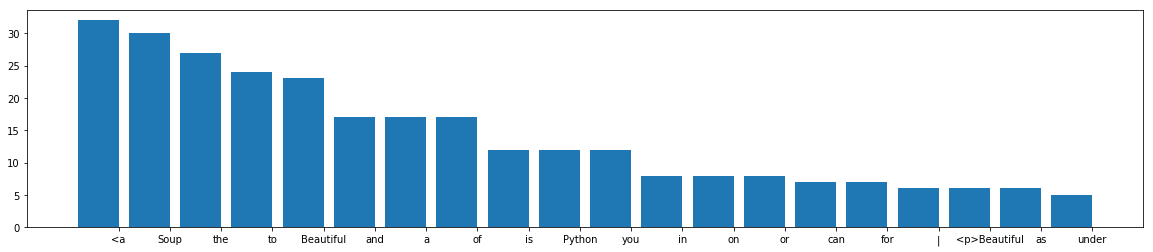

In [118]:
topfreq=L[:20]
print(topfreq)
pos = np.arange(len(topfreq))
plt.figure(figsize=(20,4))
plt.bar(pos, [e[1] for e in topfreq]);
plt.xticks(pos+0.4, [e[0] for e in topfreq]);

<html>
    <i>
        <strong>
          Question 8: (below)
                Plot a histogram of the count of the 20 most common words in the visible part (what is displayed in the browser) of the html file
        </strong>
    </i>
</html>

In [119]:
import urllib
url = 'http://www.crummy.com/software/BeautifulSoup'
source = urllib.urlopen(url).read()
sourcetokens=source.split()
uniquelctokens=set(sourcetokens)
tokendict={}
for ut in uniquelctokens:
    tokendict[ut]=sourcetokens.count(ut)
L=sorted(tokendict.items(), key= lambda item: item[1], reverse=True)[1:16]
W=sorted(tokendict.items(), key= lambda item: item[1], reverse=True)[18:23]
visible_word_list = L+W
visible_word_list

[('Soup', 30),
 ('the', 27),
 ('to', 24),
 ('Beautiful', 23),
 ('and', 17),
 ('a', 17),
 ('of', 17),
 ('is', 12),
 ('Python', 12),
 ('you', 12),
 ('in', 8),
 ('on', 8),
 ('or', 8),
 ('can', 7),
 ('for', 7),
 ('as', 6),
 ('under', 5),
 ('3', 5),
 ('You', 5),
 ('uses', 5)]

[('Soup', 30), ('the', 27), ('to', 24), ('Beautiful', 23), ('and', 17), ('a', 17), ('of', 17), ('is', 12), ('Python', 12), ('you', 12), ('in', 8), ('on', 8), ('or', 8), ('can', 7), ('for', 7), ('as', 6), ('under', 5), ('3', 5), ('You', 5), ('uses', 5)]


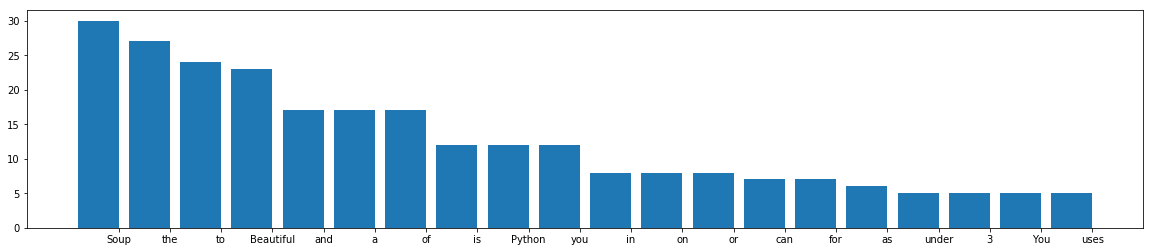

In [120]:
topfreq=visible_word_list[:20]
print(topfreq)
pos = np.arange(len(topfreq))
plt.figure(figsize=(20,4))
plt.bar(pos, [e[1] for e in topfreq]);
plt.xticks(pos+0.4, [e[0] for e in topfreq]);